In [8]:
import os
import pandas as pd

# 1. Data Load

- Check the data list of the airb dataset

In [9]:
data_dir = '../data'
airb_dir = os.path.join(data_dir, 'airb')
print(os.listdir(airb_dir))

['AirBNBReviews.csv']


In [10]:
airb_csv = os.path.join(airb_dir, 'AirBNBReviews.csv')
print(airb_csv)
print("Check in csv file: ", os.path.isfile(airb_csv))

../data/airb/AirBNBReviews.csv
Check in csv file:  True


In [11]:
airb_df = pd.read_csv(airb_csv)

# 2. Data Analysis

## Check the data

In [12]:
print(airb_df)

                 Genre                                             Review  \
0             Location  The location of this Airbnb was perfect, close...   
1          Cleanliness  The cleanliness of the Airbnb was outstanding,...   
2         Neighborhood  The neighborhood where this Airbnb is situated...   
3             Security  I felt completely safe and secure during my st...   
4     Pet Friendliness  They were so welcoming to my pet, it felt like...   
..                 ...                                                ...   
349               Host  Unfortunately, the host was unresponsive and l...   
350               Host  I experienced difficulties in reaching the hos...   
351               Host  The host was unaccommodating and did not adequ...   
352               Host  I felt unwelcome by the host, with minimal com...   
353               Host  The host was unhelpful and showed a lack of in...   

     Positive or Negative  
0                     1.0  
1                  

In [13]:
print(airb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 341 non-null    object 
 1   Review                341 non-null    object 
 2   Positive or Negative  341 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB
None


- check the label distribution

In [14]:
print(airb_df.groupby(['Genre', 'Positive or Negative']).size())

Genre              Positive or Negative
 Cleanliness       0.0                     39
                   1.0                     19
 Host              0.0                     38
                   1.0                     18
 Location          0.0                     38
                   1.0                     18
 Neighborhood      0.0                     38
                   1.0                     19
 Pet Friendliness  0.0                     38
                   1.0                     19
 Security          0.0                     38
                   1.0                     19
dtype: int64


## Plot the data distribution

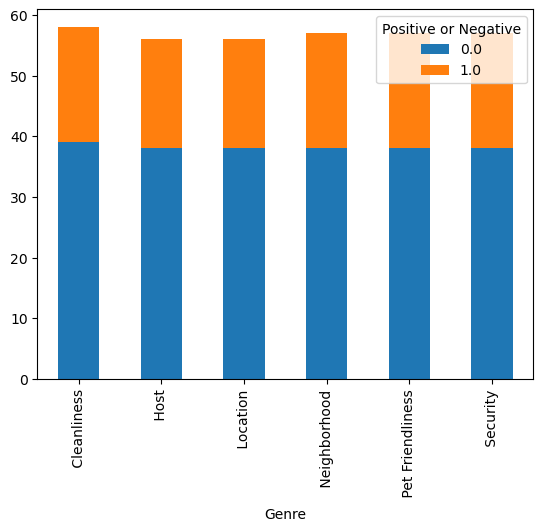

In [15]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has columns 'Genre' and 'Positive or Negative'
airb_df.groupby(['Genre', 'Positive or Negative']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

#### Word Clouds
Word clouds can give you a visual representation of the most frequently used words in your dataset. The more a specific word appears in your text, the bigger and bolder it appears in the word cloud.

In [17]:
from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Let's assume 'data' is your DataFrame and it has a column 'Review'
text = ' '.join(review for review in airb_df.Review)
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


TypeError: sequence item 36: expected str instance, float found

- check the above the error!!
    - why the error is occured?
    - how to solve the error?
    - ***Check the data Right Now!!***

In [ ]:
print(airb_df.isnull().sum())

In [ ]:
from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Let's assume 'data' is your DataFrame and it has a column 'Review'
airb_df['Review'] = airb_df['Review'].fillna('') # resolve the NaN issue
text = ' '.join(review for review in airb_df.Review)
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import STOPWORDS

# First, we'll replace NaNs with empty strings just in case
airb_df['Review'] = airb_df['Review'].fillna('')

# Define your own set of stopwords, or use the one provided by WordCloud
stopwords = set(STOPWORDS)

# Update the set of stopwords with any additional words you want to ignore
# For example, if you want to ignore the words 'the' and 'and', you would do:
# stopwords.update(['the', 'and'])

def generate_wordcloud(reviews):
    text = ' '.join(review for review in reviews)
    # wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', random_state=1502).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming 'airb_df' is your DataFrame and it has columns 'Review' and 'Positive or Negative'
positive_reviews = airb_df[airb_df['Positive or Negative'] == 1]['Review']
negative_reviews = airb_df[airb_df['Positive or Negative'] == 0]['Review']

print("Word cloud for positive reviews")
generate_wordcloud(positive_reviews)

print("Word cloud for negative reviews")
generate_wordcloud(negative_reviews)


#### Histogram of Review Lengths

This can give you an idea of the distribution of the lengths of reviews.

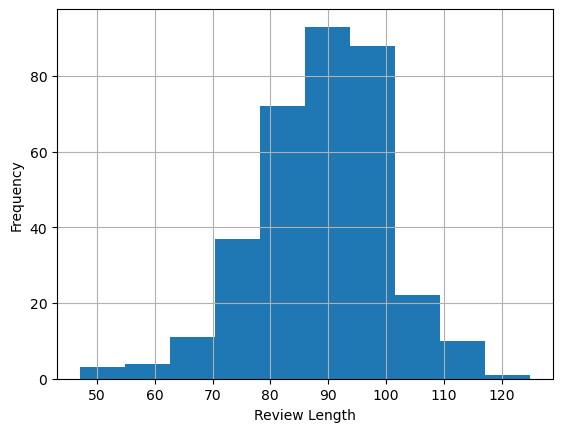

In [18]:
airb_df['Review'].str.len().hist()
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
max_len = airb_df['Review'].str.len().max()
print("Max review length: ", max_len)

Max review length:  125.0


#### Pie Chart of Sentiment Distribution:

This will give a good view of the data balance between positive and negative reviews.

In [ ]:
airb_df['Positive or Negative'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#### Heatmap of Term Frequency

 You could create a document-term matrix and then plot a heatmap to visualize the frequency of terms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(airb_df['Review'])
terms = vectorizer.get_feature_names_out()
frequency = X.toarray().sum(axis=0)

df = pd.DataFrame(frequency, index=terms, columns=["Frequency"])

# Top 20 frequent terms
top_terms = df.sort_values(by="Frequency", ascending=False).head(20)

sns.heatmap(top_terms, annot=True, cmap="YlGnBu")
plt.show()


### 3. Select Model for Sentiment Analysis

- We will use the Bert Model for sentiment analysis.

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [26]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [28]:
import torch
# Get the number of features of the last layer
num_features = model.classifier.in_features

# Add a new layer without modifying the last layer
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(num_features, num_features//2),
    torch.nn.ReLU(),
    torch.nn.Linear(num_features//2, 1)
)


In [29]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [7]:
print('Raw text: ', airb_df['Review'][0])
print('Tokenized: ', tokenizer.tokenize(airb_df['Review'][0]))

NameError: name 'airb_df' is not defined

#### Encode The Review Sentiments

In [ ]:
encoded_input = tokenizer(airb_df['Review'][0])

In [ ]:
print("Tokens for the first review: ", tokenizer.convert_ids_to_tokens(encoded_input["input_ids"]))
print("Token IDs for the first review: ", encoded_input["input_ids"])

#### Check the Vocabulary

In [ ]:
vocab = tokenizer.get_vocab()

# If you want to print only a part of the vocabulary (e.g., the first 10 items), you can do:
for i, (token, token_id) in enumerate(vocab.items()):
    print(token, token_id)
    if i > 10:
        break

In [ ]:
id_to_token = {id: token for token, id in vocab.items()}

# Replace 1012 with the ID you want to look up
token = id_to_token[1012]
print("Token for ID 1012:", token)

#### Decode the Reviews from Tokens to Words

In [ ]:
encoded_review = encoded_input["input_ids"]
print("Token IDs for the first review: ",encoded_review)

In [ ]:
decoded_review = tokenizer.decode(encoded_review)
print("Decoded review: ", decoded_review)

# 3. Split the Data

- Split the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(airb_df, test_size=0.2, random_state=42)

In [ ]:
print("Length of training data: ", len(train_data))
print("Length of test data: ", len(test_data))